<a href="https://colab.research.google.com/github/mrkhmath/Decision-trees/blob/main/DecisionTreesTraficSignsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
# Scikit-Learn ≥0.20 is
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve



In [11]:
y_train_all=pd.read_csv("y_train_all.csv")
x_train_all=pd.read_csv("x_train_all.csv")
y_test_all=pd.read_csv("y_test_all.csv")
x_test_all=pd.read_csv("x_test_all.csv")

**Using the Linear Discriminant Analysis (LDA) to reduce the dimensionility of the features.**

In [35]:
# Normalize feature data since LDA is affected by scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_all)
X_test_scaled = scaler.transform(x_test_all)
# Initialize LDA and fit it to the training data
lda = LinearDiscriminantAnalysis(n_components=None)  # selecting the maximum number of possible features using LDA = number of classes-1
X_train_lda = lda.fit_transform(X_train_scaled, y_train_all.values.ravel())
X_test_lda = lda.transform(X_test_scaled)


Max depth: 1, Mean Accuracy: 44.07%, Standard Deviation: 0.92%
Max depth: 2, Mean Accuracy: 69.34%, Standard Deviation: 1.54%
Max depth: 3, Mean Accuracy: 75.74%, Standard Deviation: 1.99%
Max depth: 4, Mean Accuracy: 84.16%, Standard Deviation: 2.50%
Max depth: 5, Mean Accuracy: 87.19%, Standard Deviation: 3.55%
Max depth: 6, Mean Accuracy: 89.28%, Standard Deviation: 3.26%
Max depth: 7, Mean Accuracy: 90.94%, Standard Deviation: 2.98%
Max depth: 8, Mean Accuracy: 91.71%, Standard Deviation: 2.65%
Max depth: 9, Mean Accuracy: 92.29%, Standard Deviation: 2.08%
Max depth: 10, Mean Accuracy: 92.47%, Standard Deviation: 2.17%
Max depth: 11, Mean Accuracy: 92.78%, Standard Deviation: 1.76%
Max depth: 12, Mean Accuracy: 92.72%, Standard Deviation: 1.48%
Max depth: 13, Mean Accuracy: 92.49%, Standard Deviation: 1.47%
Max depth: 14, Mean Accuracy: 92.38%, Standard Deviation: 1.70%
Max depth: 15, Mean Accuracy: 92.36%, Standard Deviation: 1.57%
Max depth: 16, Mean Accuracy: 92.43%, Standard De

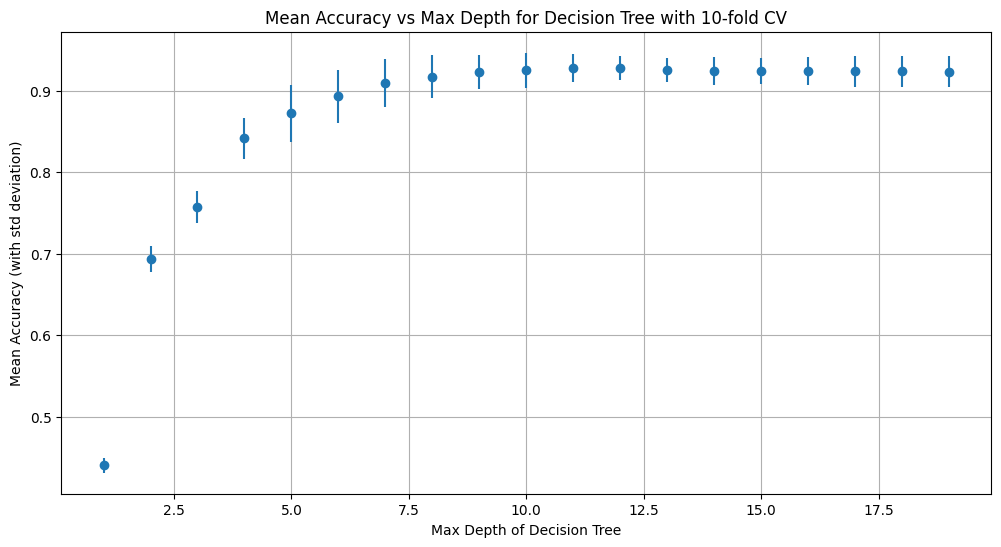

    Max Depth  Mean Accuracy  Accuracy Std Deviation
0           1       0.440660                0.009207
1           2       0.693395                0.015428
2           3       0.757379                0.019912
3           4       0.841589                0.024957
4           5       0.871930                0.035451
5           6       0.892776                0.032577
6           7       0.909391                0.029756
7           8       0.917131                0.026452
8           9       0.922910                0.020810
9          10       0.924665                0.021731
10         11       0.927761                0.017598
11         12       0.927245                0.014756
12         13       0.924871                0.014746
13         14       0.923839                0.017031
14         15       0.923633                0.015746
15         16       0.924252                0.016959
16         17       0.923633                0.019296
17         18       0.923736                0.

In [73]:

# Defining a function to
def evaluate_max_depth_range_with_cv(X, y, max_depth_range, cv_folds):
    mean_accuracies = []
    std_accuracies = []

    # Loop over the desired depth range and record accuracy
    for max_depth in max_depth_range:
        clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        # Perform cross-validation and obtain the mean and standard deviation of the scores
        scores = cross_val_score(clf, X, y.values.ravel(), cv=cv_folds, scoring='accuracy')
        mean_accuracies.append(scores.mean())
        std_accuracies.append(scores.std())
        print(f'Max depth: {max_depth}, Mean Accuracy: {scores.mean() * 100:.2f}%, Standard Deviation: {scores.std() * 100:.2f}%')

    # Create a DataFrame for easy table visualization
    results_df = pd.DataFrame({
        'Max Depth': max_depth_range,
        'Mean Accuracy': mean_accuracies,
        'Accuracy Std Deviation': std_accuracies
    })

    # Plotting the relationship between max_depth and mean accuracy
    plt.figure(figsize=(12, 6))
    plt.errorbar(max_depth_range, mean_accuracies, yerr=std_accuracies, fmt='o')
    plt.xlabel('Max Depth of Decision Tree')
    plt.ylabel('Mean Accuracy (with std deviation)')
    plt.title('Mean Accuracy vs Max Depth for Decision Tree with 10-fold CV')
    plt.grid(True)
    plt.show()

    return results_df

# Define the range of max_depth you want to evaluate
max_depth_range = range(1, 20)  # Define a range from 1 to 20


# Calling the function with the loaded data, max depth range, and number of cross-validation folds
results_df = evaluate_max_depth_range_with_cv(X_train_lda, y_train_all, max_depth_range, cv_folds=10)
print(results_df)


**According to the above analysis, we can observe that max_depth=11 is giving the highst accuracy with low standard deviation**

In [74]:
clf = DecisionTreeClassifier(max_depth=11, random_state=42)
clf.fit(X_train_lda, y_train_all.values.ravel())

DecisionTreeClassifier(max_depth=11, random_state=42)

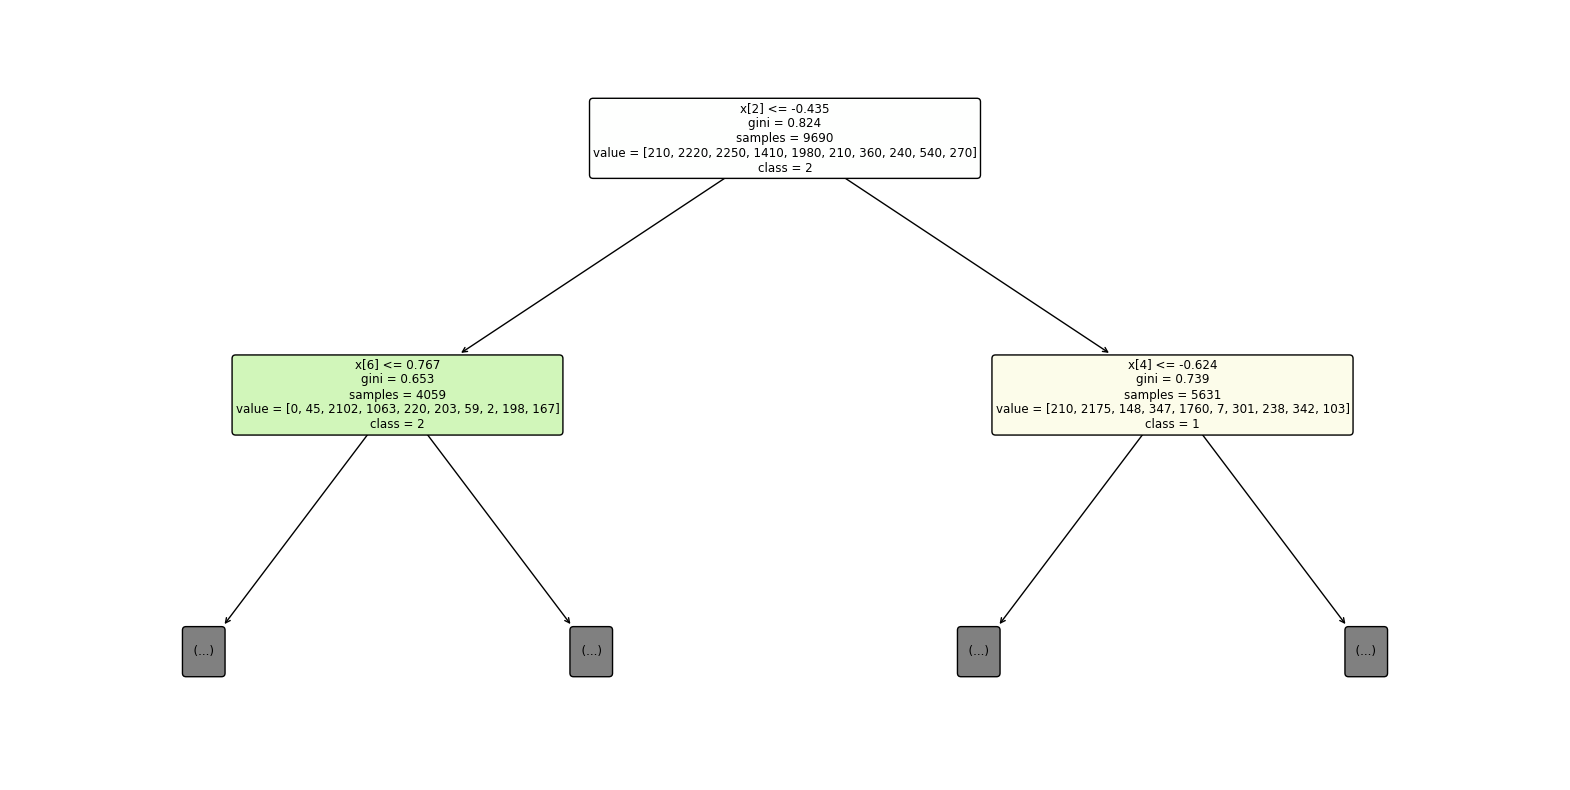

In [85]:
# Plot the top of the decision tree
plt.figure(figsize=(20, 10))  # Set the figure size as large as needed
plot_tree(
    clf,
    filled=True,
    rounded=True,
    class_names=['0', '1', '2','3', '4', '5','6', '7', '8','9'],
    max_depth= 1 # Only plot the top 3 levels for clarity
)
plt.show()
